In [9]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

In [35]:
FILENAME = 'Hydrides.csv'
# Input string with numbers and capital letters
data = pd.read_csv(FILENAME, index_col=0)
combined_string = data['Composition_Formula'].to_string(header=False, index=False).replace('\n', '').replace(' ', '').strip()

In [36]:
data.columns

Index(['Composition_Formula', 'Equilibrium_Pressure_25C',
       'Heat_of_Formation_kJperMolH2', 'bin', '3bin_limit', '2bin_real',
       'element', 'pred_elements', 'ln_pressure', 'regression_pred',
       'regression_bin_pred', 'regression_bin_pred_median', 'binary_heat'],
      dtype='object')

In [37]:
df = data[['Composition_Formula','Equilibrium_Pressure_25C', 'Heat_of_Formation_kJperMolH2','bin', '3bin_limit', '2bin_real']]

In [39]:
df['bin'].value_counts()

bin
1    254
2    150
0     23
Name: count, dtype: int64

## Elemental Composition

In [40]:
EXTENDED = '[A-Z][a-z]?\d*'
ELEMENTS = '[A-Z][a-z]?\d*'

df['element'] = [re.findall(r'[A-Z][a-z]?', entry) for entry in df['Composition_Formula']]


/tmp/ipykernel_1315334/3819829912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['element'] = [re.findall(r'[A-Z][a-z]?', entry) for entry in df['Composition_Formula']]


In [42]:
elements:list = []
for i, row in df.iterrows():
    for e in row['element']:
        elements.append(e)

elements_unique = list(set(elements))
elements_unique.sort()
print(len(elements_unique))
print(f'Unique Elements: {elements_unique}')

51
Unique Elements: ['Ag', 'Al', 'B', 'Be', 'Bi', 'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Dy', 'Er', 'Eu', 'Fe', 'Ga', 'Gd', 'Ge', 'Hf', 'Ho', 'In', 'Ir', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'Nb', 'Nd', 'Ni', 'O', 'Pd', 'Pr', 'Pt', 'Rh', 'Ru', 'Sb', 'Sc', 'Si', 'Sm', 'Sn', 'Ta', 'Tb', 'Th', 'Ti', 'Tm', 'U', 'V', 'Y', 'Zn', 'Zr']


In [17]:
all = {element: {2:0,1:0, 0:0} for element in elements_unique}

for i, row in df.iterrows():
    bin = row['bin']
    for e in row['element']:
        all[e][bin] += 1
print(all)

{'Ag': {2: 1, 1: 1, 0: 0}, 'Al': {2: 26, 1: 32, 0: 0}, 'B': {2: 1, 1: 1, 0: 1}, 'Be': {2: 0, 1: 1, 0: 0}, 'Bi': {2: 0, 1: 1, 0: 0}, 'Ca': {2: 3, 1: 12, 0: 0}, 'Ce': {2: 9, 1: 26, 0: 0}, 'Co': {2: 39, 1: 33, 0: 2}, 'Cr': {2: 14, 1: 45, 0: 11}, 'Cu': {2: 12, 1: 18, 0: 4}, 'Dy': {2: 3, 1: 4, 0: 0}, 'Er': {2: 2, 1: 7, 0: 0}, 'Eu': {2: 0, 1: 1, 0: 0}, 'Fe': {2: 25, 1: 58, 0: 14}, 'Ga': {2: 0, 1: 2, 0: 0}, 'Gd': {2: 6, 1: 3, 0: 0}, 'Ge': {2: 0, 1: 2, 0: 0}, 'Hf': {2: 6, 1: 0, 0: 0}, 'Ho': {2: 1, 1: 7, 0: 0}, 'In': {2: 0, 1: 3, 0: 0}, 'Ir': {2: 0, 1: 2, 0: 1}, 'La': {2: 21, 1: 67, 0: 0}, 'Li': {2: 2, 1: 0, 0: 0}, 'Lu': {2: 0, 1: 2, 0: 0}, 'Mg': {2: 38, 1: 13, 0: 0}, 'Mn': {2: 12, 1: 75, 0: 14}, 'Mo': {2: 1, 1: 7, 0: 2}, 'Nb': {2: 10, 1: 1, 0: 0}, 'Nd': {2: 5, 1: 4, 0: 0}, 'Ni': {2: 43, 1: 115, 0: 3}, 'O': {2: 1, 1: 0, 0: 0}, 'Pd': {2: 5, 1: 29, 0: 1}, 'Pr': {2: 6, 1: 12, 0: 1}, 'Pt': {2: 0, 1: 6, 0: 0}, 'Rh': {2: 2, 1: 11, 0: 0}, 'Ru': {2: 1, 1: 0, 0: 0}, 'Sb': {2: 0, 1: 1, 0: 0}, 'Sc': {2: 1

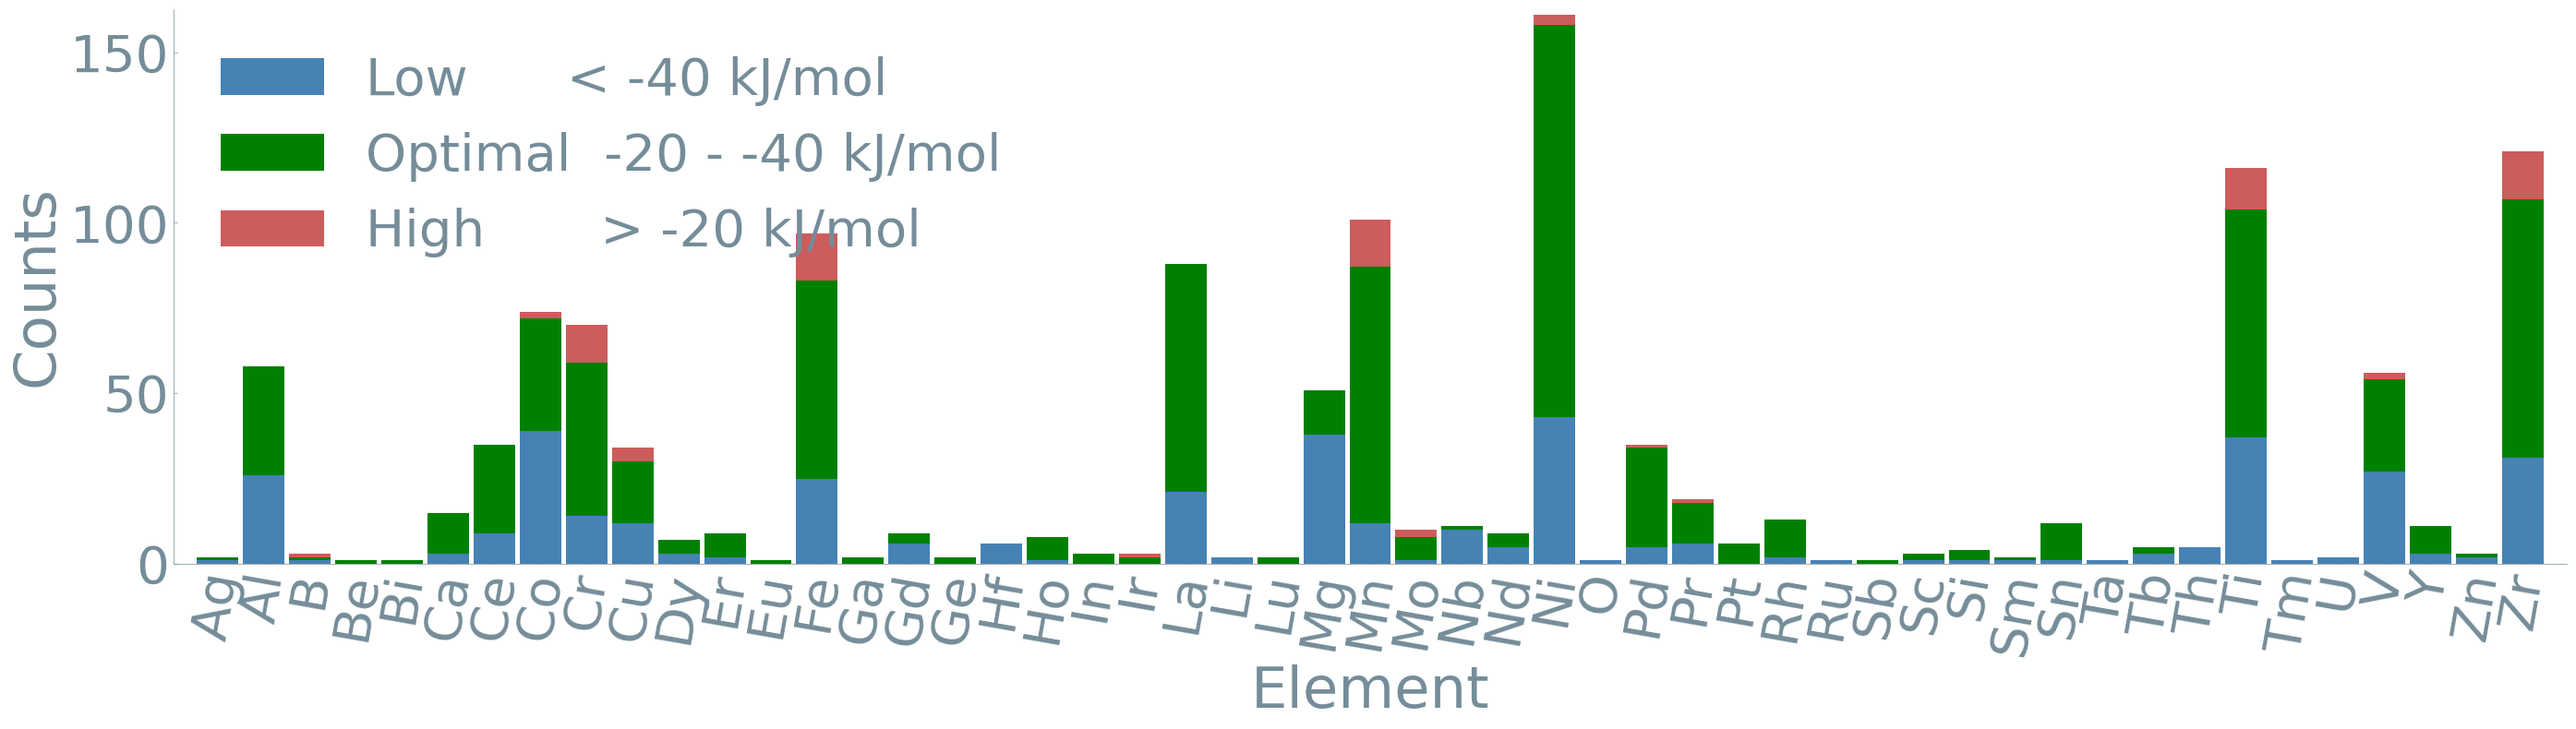

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = all

# Extract labels and values
labels = list(data.keys())
categories = list(data['Ag'].keys())
cate = {0:'High       > -20 kJ/mol', 1: 'Optimal  -20 - -40 kJ/mol', 2:'Low      < -40 kJ/mol'}

values = [[data[label][cat] for cat in categories] for label in labels]

colors = ['steelblue', 'g', 'indianred']

fig, ax = plt.subplots(figsize = (28,8), tight_layout = True)

BAR_WIDTH = 0.9
index = np.arange(len(labels))

bottom_values = np.zeros(len(labels))

for i, cat in enumerate(categories):
    ax.bar(index, [value[i] for value in values], BAR_WIDTH, label=cate[cat], color=colors[i], bottom=bottom_values)
    bottom_values += [value[i] for value in values]

# Set labels and title
FONTSIZE = 45
ax.set_xlabel('Element', fontsize = FONTSIZE)
ax.set_ylabel('Counts', fontsize=FONTSIZE) 
#ax.set_title('Hydrides - Elements', fontsize = FONTSIZE *1.2)

ax.set_xticks(index)
ax.set_xticklabels(labels)

ax.tick_params(labelsize=FONTSIZE*0.9)  
ax.tick_params(axis='x', rotation = 80)

ax.legend(fontsize = FONTSIZE*0.9)

plt.margins(0.01)
plt.savefig('elemental_analysis.pdf')
plt.show()


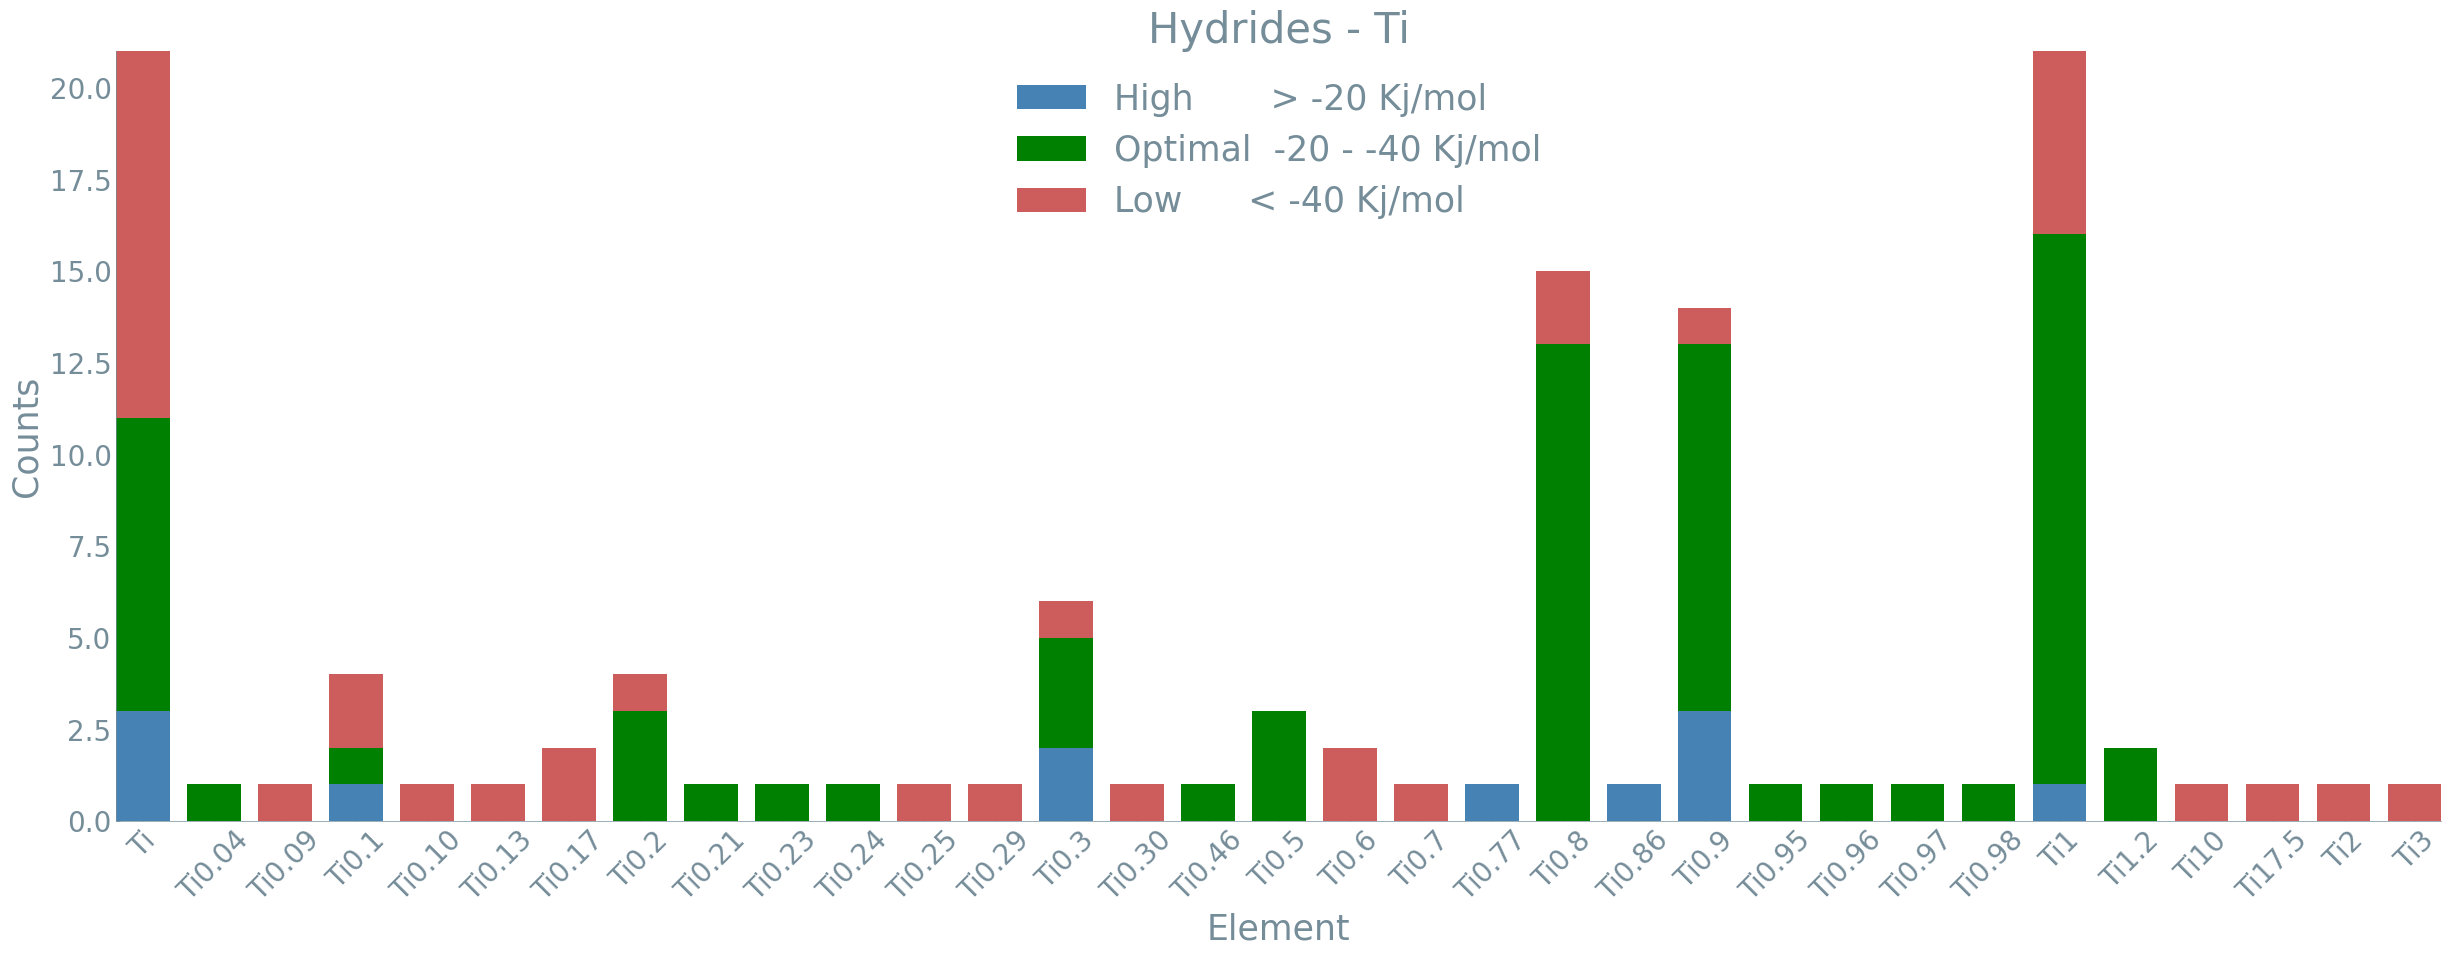

In [19]:
def show_elemental(element):
    df['element'] = [re.findall(r'[A-Z][a-z]?\d*(?:\.\d{1,2})?', entry) for entry in df['Composition_Formula']]

    elements_ext:list = []
    for i, row in df.iterrows():
        for e in row['element']:
            elements_ext.append(e)

    elements_ext_unique = list(set(elements_ext))
    elements_ext_unique.sort()


    all_ext = {element: {2:0,1:0, 0:0} for element in elements_ext_unique}

    for i, row in df.iterrows():
        bin = row['bin']
        for e in row['element']:
            all_ext[e][bin] += 1


    # Your data
    data = {k:v for k,v in all_ext.items() if k.startswith(element)}

    # Extract labels and values
    labels = list(data.keys())
    categories = [0 ,1 ,2]
    cate = {0:'High       > -20 Kj/mol', 1: 'Optimal  -20 - -40 Kj/mol', 2:'Low      < -40 Kj/mol'}

    values = [[data[label][cat] for cat in categories] for label in labels]

    # Set the color map for bars
    colors = ['steelblue', 'g', 'indianred']

    # Create a figure and axis
    fig, ax = plt.subplots(figsize = (30,10))

    # Width of a single bar
    bar_width = 0.75
    index = np.arange(len(labels))

    # Initialize bottom values for stacking
    bottom_values = np.zeros(len(labels))

    # Create stacked bars for each category
    for i, cat in enumerate(categories):
        ax.bar(index, [value[i] for value in values], bar_width, label=cate[cat], color=colors[i], bottom=bottom_values)
        bottom_values += [value[i] for value in values]

    # Set labels and title
    FONTSIZE = 25
    ax.set_xlabel('Element', fontsize = FONTSIZE)
    ax.set_ylabel('Counts', fontsize=FONTSIZE)  # Increase the font size of the y-label
    ax.set_title(f'Hydrides - {element}', fontsize = FONTSIZE *1.2)

    # Set x-axis labels
    ax.set_xticks(index)
    ax.set_xticklabels(labels)

    # Increase the font size of y-axis tick labels
    ax.tick_params(labelsize=20)  # Increase the font size here (change 12 to your desired size)
    ax.tick_params(axis='x', rotation = 45)

    # Add a legend
    ax.legend(fontsize = FONTSIZE)

    # Show the plot
    plt.show()


show_elemental('Ti')

                         Composition_Formula  Equilibrium_Pressure_25C  \
3                                      Zr2Ni              2.058957e-24   
4                                      Mg2Ni              1.240158e-05   
5                            Mg2Co0.25Ni0.75              6.333240e-06   
6                            Mg2Fe0.25Ni0.75              6.280057e-06   
7                            Mg2Cr0.25Ni0.75              2.279544e-05   
..                                       ...                       ...   
403                      La0.2Y0.8Ni4.6Mn0.4              5.652308e+00   
406                       La0.4Ce0.4Ca0.2Ni5              1.253613e+01   
408                    Zr0.8Ti0.2FeNi0.8V0.2              3.157637e+01   
409  Ti0.77Zr0.3Cr0.85Fe0.7Mn0.25Ni0.2Cu0.03              3.380666e+01   
417                             ZrFe1.8Ni0.2              3.148176e+02   

     Heat_of_Formation_kJperMolH2  bin  3bin_limit  2bin_real  \
3                         -183.00    2        

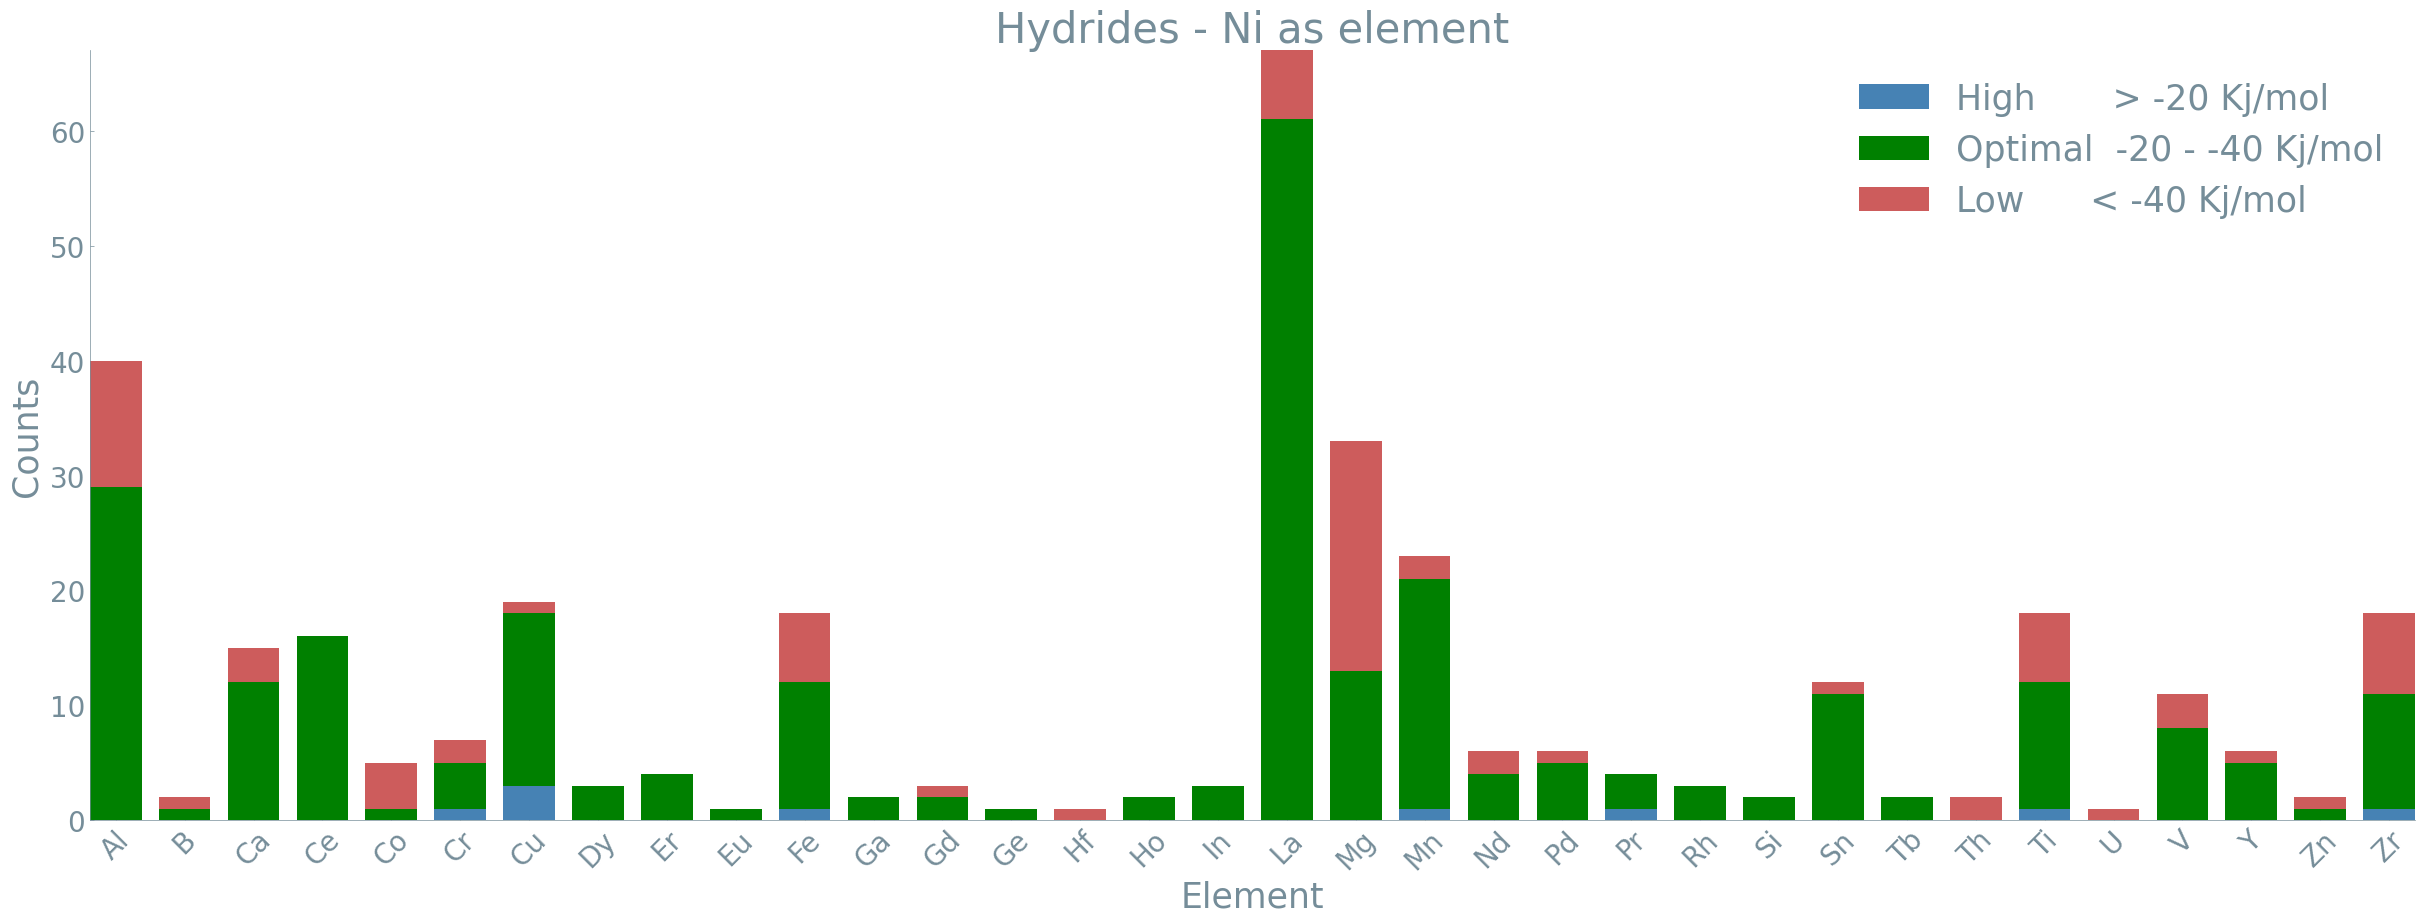

In [20]:
def show_elemental_givenElement(df, element):
    df['element'] = [re.findall(r'[A-Z][a-z]?', entry) for entry in df['Composition_Formula']]
    df = df[df['element'].apply(lambda x: element in x)]
    #df['element'] = [re.findall(r'[A-Z][a-z]?\d*(?:\.\d{1,2})?', entry) for entry in df['Composition_Formula']]
    print(df)

    elements_ext:list = []
    for i, row in df.iterrows():
        for e in row['element']:
            elements_ext.append(e)

    elements_ext_unique = list(set(elements_ext))
    elements_ext_unique.sort()


    all_ext = {element: {2:0,1:0, 0:0} for element in elements_ext_unique}

    for i, row in df.iterrows():
        bin = row['bin']
        for e in row['element']:
            all_ext[e][bin] += 1


    # Your data
    data = {k:v for k,v in all_ext.items() if k != element}

    # Extract labels and values
    labels = list(data.keys())
    categories = [0 ,1 ,2]
    cate = {0:'High       > -20 Kj/mol', 1: 'Optimal  -20 - -40 Kj/mol', 2:'Low      < -40 Kj/mol'}

    values = [[data[label][cat] for cat in categories] for label in labels]

    # Set the color map for bars
    colors = ['steelblue', 'g', 'indianred']

    # Create a figure and axis
    fig, ax = plt.subplots(figsize = (30,10))

    # Width of a single bar
    bar_width = 0.75
    index = np.arange(len(labels))

    # Initialize bottom values for stacking
    bottom_values = np.zeros(len(labels))

    # Create stacked bars for each category
    for i, cat in enumerate(categories):
        ax.bar(index, [value[i] for value in values], bar_width, label=cate[cat], color=colors[i], bottom=bottom_values)
        bottom_values += [value[i] for value in values]

    # Set labels and title
    FONTSIZE = 25
    ax.set_xlabel('Element', fontsize = FONTSIZE)
    ax.set_ylabel('Counts', fontsize=FONTSIZE)  # Increase the font size of the y-label
    ax.set_title(f'Hydrides - {element} as element', fontsize = FONTSIZE *1.2)

    # Set x-axis labels
    ax.set_xticks(index)
    ax.set_xticklabels(labels)

    # Increase the font size of y-axis tick labels
    ax.tick_params(labelsize=20)  # Increase the font size here (change 12 to your desired size)
    ax.tick_params(axis='x', rotation = 45)

    # Add a legend
    ax.legend(fontsize = FONTSIZE)

    # Show the plot
    plt.show()


show_elemental_givenElement(df ,'Ni')

### Dominant bin

In [21]:
dominant_bin = {}
for element, bins in all.items():
    bins = {v:k for k,v in bins.items()}
    dominant = bins[max(bins.keys())]
    dominant_bin[element]=dominant

bin_elements = {0:[], 1:[], 2:[]}
for element, bin in dominant_bin.items():
    bin_elements[bin].append(element)

print(bin_elements[1])

['Ag', 'Al', 'Be', 'Bi', 'Ca', 'Ce', 'Cr', 'Cu', 'Dy', 'Er', 'Eu', 'Fe', 'Ga', 'Ge', 'Ho', 'In', 'Ir', 'La', 'Lu', 'Mn', 'Mo', 'Ni', 'Pd', 'Pr', 'Pt', 'Rh', 'Sb', 'Sc', 'Si', 'Sm', 'Sn', 'Ti', 'V', 'Y', 'Zr']


### Predicting based on element

In [22]:
def get_prediction_from_element(elements):
    predictions, count = [], []
    for i in elements:
        print(i)
        print(all[i])
        pred = [[k,v] for k,v in all[i].items() if v == max(all[i].values())]
        print(pred)
        predictions.append(pred[0][0])
        count.append(pred[0][1])

        print(f'Based on {i}: {pred[0][0]}')

    
    if len(predictions) ==1:
        return predictions[0].keys()[0]
    
    else:
        if len(list(set(predictions))) == 1:
            print(f'Final prediction: {predictions[0]}')
            return predictions[0]
        else:
            maxi = max(count)
            index = count.index(max(count))
            print(f'Final prediction: {predictions[index]}')
            return predictions[index]



In [23]:
test = df['element'].loc[5]
df['pred_elements'] = [get_prediction_from_element(i) for i in df['element']]

Th
{2: 5, 1: 0, 0: 0}
[[2, 5]]
Based on Th: 2
Al
{2: 26, 1: 32, 0: 0}
[[1, 32]]
Based on Al: 1
Final prediction: 1
Ti
{2: 37, 1: 67, 0: 12}
[[1, 67]]
Based on Ti: 1
Cu
{2: 12, 1: 18, 0: 4}
[[1, 18]]
Based on Cu: 1
Final prediction: 1
Zr
{2: 31, 1: 76, 0: 14}
[[1, 76]]
Based on Zr: 1
Cu
{2: 12, 1: 18, 0: 4}
[[1, 18]]
Based on Cu: 1
Final prediction: 1
Zr
{2: 31, 1: 76, 0: 14}
[[1, 76]]
Based on Zr: 1
Ni
{2: 43, 1: 115, 0: 3}
[[1, 115]]
Based on Ni: 1
Final prediction: 1
Mg
{2: 38, 1: 13, 0: 0}
[[2, 38]]
Based on Mg: 2
Ni
{2: 43, 1: 115, 0: 3}
[[1, 115]]
Based on Ni: 1
Final prediction: 1
Mg
{2: 38, 1: 13, 0: 0}
[[2, 38]]
Based on Mg: 2
Co
{2: 39, 1: 33, 0: 2}
[[2, 39]]
Based on Co: 2
Ni
{2: 43, 1: 115, 0: 3}
[[1, 115]]
Based on Ni: 1
Final prediction: 1
Mg
{2: 38, 1: 13, 0: 0}
[[2, 38]]
Based on Mg: 2
Fe
{2: 25, 1: 58, 0: 14}
[[1, 58]]
Based on Fe: 1
Ni
{2: 43, 1: 115, 0: 3}
[[1, 115]]
Based on Ni: 1
Final prediction: 1
Mg
{2: 38, 1: 13, 0: 0}
[[2, 38]]
Based on Mg: 2
Cr
{2: 14, 1: 45, 

In [24]:
accuracy = np.mean(df['3bin_limit'] == df['pred_elements']) * 100
print(accuracy)

61.59250585480094
